**Models Training on Transformed Edge_IIOTset Dataset (Hyperparmeters are Supposed)**

In [ ]:
pip install Keras-Applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 598.8 kB/s eta 0:00:00


In [ ]:
import os
from keras.preprocessing.image import  ImageDataGenerator
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from keras.models import Model,load_model,Sequential
from keras.applications.xception import  Xception
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.efficientnet import EfficientNetB7
from keras.applications.efficientnet_v2 import EfficientNetV2L
import keras.callbacks as kcallbacks
import keras
#from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.utils import img_to_array
import math
import random
from keras.utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

**Generate Training and Test Images**

In [ ]:
#generate training and test images
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=32	#could try 128 or 32

#Normalization
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train_A',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/test_A',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 5369 images belonging to 15 classes.
Found 1342 images belonging to 15 classes.


**Model 1: Generic CNN model**

Epoch 1/25
168/168 [==============================] - ETA: 0s - loss: 1.1067 - accuracy: 0.7217
Epoch 1: val_accuracy improved from -inf to 0.81297, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/generic_cnn.h5
168/168 [==============================] - 49s 285ms/step - loss: 1.1067 - accuracy: 0.7217 - val_loss: 0.5356 - val_accuracy: 0.8130
Epoch 2/25
168/168 [==============================] - ETA: 0s - loss: 0.4475 - accuracy: 0.8350
Epoch 2: val_accuracy improved from 0.81297 to 0.88003, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/generic_cnn.h5
168/168 [==============================] - 48s 282ms/step - loss: 0.4475 - accuracy: 0.8350 - val_loss: 0.3562 - val_accuracy: 0.8800
Epoch 3/25
168/168 [==============================] - ETA: 0s - loss: 0.3402 - accuracy: 0.8728
Epoch 3: val_accuracy did not improve from 0.88003
168/168 [==============================] - 47s 277ms/step - loss: 0.3402 - accuracy: 0.8728 - val_loss: 0.3239

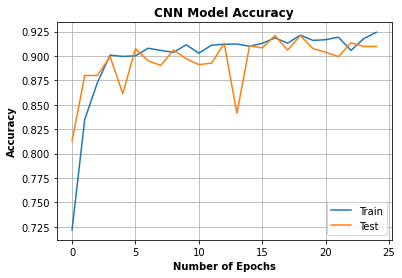

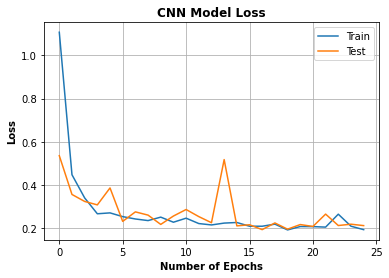

In [ ]:
input_shape=INPUT_SIZE
num_class=15
epochs=25
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/generic_cnn.h5'

#Define CNN Model
model = Sequential()
model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=input_shape,padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(num_class,activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.0076, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()
plt.show()


**Model 2: Xception**

Epoch 1/25
168/168 [==============================] - ETA: 0s - loss: 1.0555 - accuracy: 0.8190
Epoch 1: val_accuracy improved from -inf to 0.82638, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/xception.h5
168/168 [==============================] - 37s 205ms/step - loss: 1.0555 - accuracy: 0.8190 - val_loss: 1.9406 - val_accuracy: 0.8264
Epoch 2/25
168/168 [==============================] - ETA: 0s - loss: 0.3617 - accuracy: 0.8808
Epoch 2: val_accuracy did not improve from 0.82638
168/168 [==============================] - 31s 186ms/step - loss: 0.3617 - accuracy: 0.8808 - val_loss: 1.8799 - val_accuracy: 0.8048
Epoch 3/25
168/168 [==============================] - ETA: 0s - loss: 0.3427 - accuracy: 0.8789
Epoch 3: val_accuracy improved from 0.82638 to 0.87779, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/xception.h5
168/168 [==============================] - 33s 198ms/step - loss: 0.3427 - accuracy: 0.8789 - val_loss: 0.4212 - val

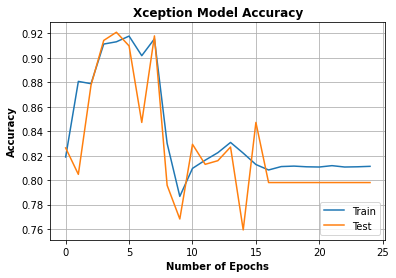

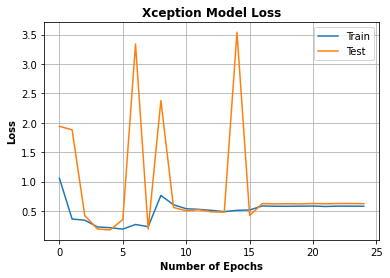

In [ ]:
input_shape=INPUT_SIZE
num_class=15
epochs=25
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/xception.h5'

#Define Xception Model
model_fine_tune = Xception(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in model_fine_tune.layers[:120]:
    layer.trainable = False
for layer in model_fine_tune.layers[120:]:
    layer.trainable = True
model = GlobalAveragePooling2D()(model_fine_tune.output)
model=Dense(units=128,activation='relu')(model)
model=Dropout(0.3)(model)
model = Dense(num_class, activation='softmax')(model)
model = Model(model_fine_tune.input, model, name='xception')
opt = keras.optimizers.Adam(learning_rate=0.06, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Xception Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Xception Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()
plt.show()


**Model 3: VGG16**

In [ ]:
input_shape=INPUT_SIZE
num_class=15
epochs=25
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/VGG16.h5'

#Define VGG16 Model
model_fine_tune = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in model_fine_tune.layers[:30]:	
    layer.trainable = False
for layer in model_fine_tune.layers[30:]:
    layer.trainable = True
model = GlobalAveragePooling2D()(model_fine_tune.output) 
model=Dense(units=256,activation='relu')(model)
model=Dropout(0.2)(model)
model = Dense(num_class, activation='softmax')(model)
model = Model(model_fine_tune.input, model, name='vgg')
opt = keras.optimizers.Adam(learning_rate=0.056, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG16 Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG16 Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()
plt.show()


Epoch 1/25
168/168 [==============================] - ETA: 0s - loss: 0.8650 - accuracy: 0.7908
Epoch 1: val_accuracy improved from -inf to 0.81967, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/VGG16.h5
168/168 [==============================] - 33s 190ms/step - loss: 0.8650 - accuracy: 0.7908 - val_loss: 0.4693 - val_accuracy: 0.8197
Epoch 2/25
168/168 [==============================] - ETA: 0s - loss: 0.4419 - accuracy: 0.8471
Epoch 2: val_accuracy improved from 0.81967 to 0.87407, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/VGG16.h5
168/168 [==============================] - 33s 197ms/step - loss: 0.4419 - accuracy: 0.8471 - val_loss: 0.3598 - val_accuracy: 0.8741
Epoch 3/25
168/168 [==============================] - ETA: 0s - loss: 0.4119 - accuracy: 0.8609
Epoch 3: val_accuracy did not improve from 0.87407
168/168 [==============================] - 32s 191ms/step - loss: 0.4119 - accuracy: 0.8609 - val_loss: 0.3348 - val_accur

**Model 4: VGG19**

80134624/80134624 [==============================] - 4s 0us/step
Epoch 1/25
168/168 [==============================] - ETA: 0s - loss: 0.5790 - accuracy: 0.8363
Epoch 1: val_accuracy improved from -inf to 0.92921, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/VGG19.h5
168/168 [==============================] - 47s 275ms/step - loss: 0.5790 - accuracy: 0.8363 - val_loss: 0.2638 - val_accuracy: 0.9292
Epoch 2/25
168/168 [==============================] - ETA: 0s - loss: 0.2274 - accuracy: 0.9244
Epoch 2: val_accuracy improved from 0.92921 to 0.95827, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/VGG19.h5
168/168 [==============================] - 42s 248ms/step - loss: 0.2274 - accuracy: 0.9244 - val_loss: 0.1645 - val_accuracy: 0.9583
Epoch 3/25
168/168 [==============================] - ETA: 0s - loss: 0.1595 - accuracy: 0.9419
Epoch 3: val_accuracy did not improve from 0.95827
168/168 [==============================] - 40s 237ms/step

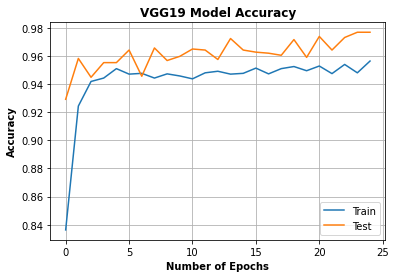

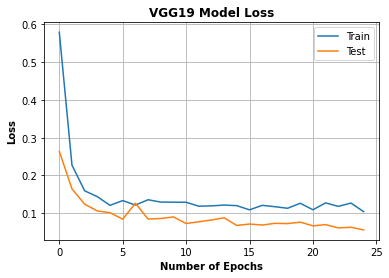

In [ ]:
input_shape=INPUT_SIZE
num_class=15
epochs=25
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/VGG19.h5'

#Define VGG19 Model
model_fine_tune = VGG19(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in model_fine_tune.layers[:40]:	
    layer.trainable = False
for layer in model_fine_tune.layers[40:]:
    layer.trainable = True
model = GlobalAveragePooling2D()(model_fine_tune.output)
model = Dense(units=128,activation='relu')(model)
model = Dropout(0.3)(model)
model = Dense(num_class, activation='softmax')(model)
model = Model(model_fine_tune.input, model, name='vgg')
opt = keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
   
#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG19 Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG19 Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()
plt.show()


**Model 5: Inception**

87910968/87910968 [==============================] - 5s 0us/step
Epoch 1/25
168/168 [==============================] - ETA: 0s - loss: 0.8901 - accuracy: 0.7713
Epoch 1: val_accuracy improved from -inf to 0.02981, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/inception.h5
168/168 [==============================] - 55s 277ms/step - loss: 0.8901 - accuracy: 0.7713 - val_loss: 886.6967 - val_accuracy: 0.0298
Epoch 2/25
168/168 [==============================] - ETA: 0s - loss: 0.3677 - accuracy: 0.8666
Epoch 2: val_accuracy improved from 0.02981 to 0.73025, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/inception.h5
168/168 [==============================] - 39s 229ms/step - loss: 0.3677 - accuracy: 0.8666 - val_loss: 18.2251 - val_accuracy: 0.7303
Epoch 3/25
168/168 [==============================] - ETA: 0s - loss: 0.4817 - accuracy: 0.8095
Epoch 3: val_accuracy improved from 0.73025 to 0.76379, saving model to /content/drive/MyDrive/Tr

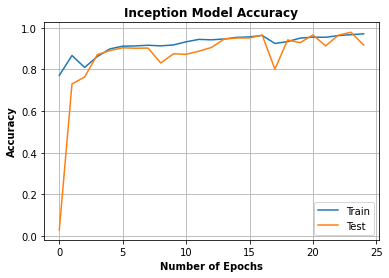

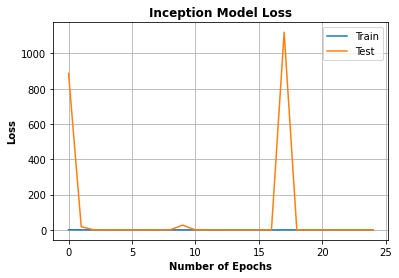

In [ ]:
input_shape=INPUT_SIZE
num_class=15
epochs=25
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/inception.h5'

#Define Inception Model
model_fine_tune = InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in model_fine_tune.layers[:65]:
    layer.trainable = False
for layer in model_fine_tune.layers[65:]:
    layer.trainable = True
model = GlobalAveragePooling2D()(model_fine_tune.output)
model=Dense(units=256,activation='relu')(model)
model=Dropout(0.2)(model)
model = Dense(num_class, activation='softmax')(model)
model = Model(model_fine_tune.input, model, name='resnet')
opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Inception Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Inception Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()

**Model 6: InceptionResnet V2**

219055592/219055592 [==============================] - 10s 0us/step
Epoch 1/25
168/168 [==============================] - ETA: 0s - loss: 2.3527 - accuracy: 0.7489 
Epoch 1: val_accuracy improved from -inf to 0.78390, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/inceptionresnetv2.h5
168/168 [==============================] - 5380s 32s/step - loss: 2.3527 - accuracy: 0.7489 - val_loss: 3.9751 - val_accuracy: 0.7839
Epoch 2/25
168/168 [==============================] - ETA: 0s - loss: 0.5627 - accuracy: 0.7925
Epoch 2: val_accuracy improved from 0.78390 to 0.82414, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/inceptionresnetv2.h5
168/168 [==============================] - 56s 331ms/step - loss: 0.5627 - accuracy: 0.7925 - val_loss: 0.6919 - val_accuracy: 0.8241
Epoch 3/25
168/168 [==============================] - ETA: 0s - loss: 0.5568 - accuracy: 0.8044
Epoch 3: val_accuracy did not improve from 0.82414
168/168 [====================

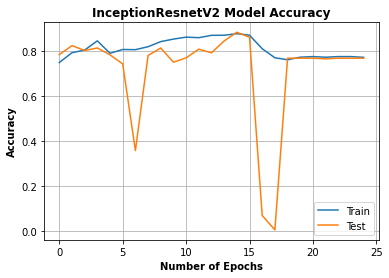

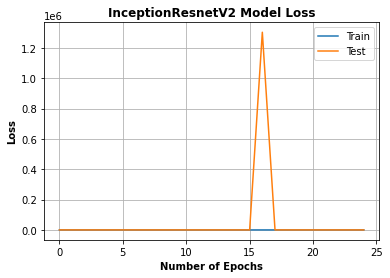

In [ ]:
input_shape=INPUT_SIZE
num_class=15
epochs=25
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/inceptionresnetv2.h5'

#Define Inception Resnet V2 Model
model_fine_tune = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in model_fine_tune.layers[:540]:
    layer.trainable = False
for layer in model_fine_tune.layers[540:]:
    layer.trainable = True
model = GlobalAveragePooling2D()(model_fine_tune.output)
model=Dense(units=256,activation='relu')(model)
model=Dropout(0.2)(model)
model = Dense(num_class, activation='softmax')(model)
model = Model(model_fine_tune.input, model, name='resnet')
opt = keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('InceptionResnetV2 Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('InceptionResnetV2 Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()


**Model 7: EfficientNetB7**

Epoch 1/25
168/168 [==============================] - ETA: 0s - loss: 0.8384 - accuracy: 0.7901
Epoch 1: val_accuracy improved from -inf to 0.73174, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/efficientnetb7.h5
168/168 [==============================] - 229s 1s/step - loss: 0.8384 - accuracy: 0.7901 - val_loss: 7.9461 - val_accuracy: 0.7317
Epoch 2/25
168/168 [==============================] - ETA: 0s - loss: 0.4109 - accuracy: 0.8631
Epoch 2: val_accuracy improved from 0.73174 to 0.83607, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/efficientnetb7.h5
168/168 [==============================] - 161s 961ms/step - loss: 0.4109 - accuracy: 0.8631 - val_loss: 0.4536 - val_accuracy: 0.8361
Epoch 3/25
168/168 [==============================] - ETA: 0s - loss: 0.4771 - accuracy: 0.8432
Epoch 3: val_accuracy improved from 0.83607 to 0.85917, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/efficientnetb7.h5
168/168 [=

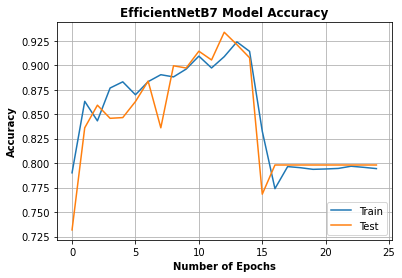

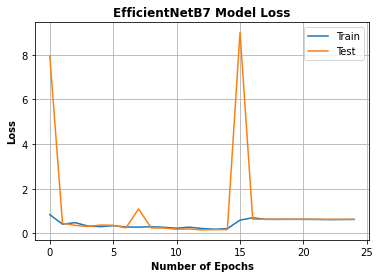

In [ ]:
input_shape=INPUT_SIZE
num_class=15
epochs=25
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/efficientnetb7.h5'

#Define EfficientNetB7 Model
model_fine_tune = EfficientNetB7(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in model_fine_tune.layers[:350]:
    layer.trainable = False
for layer in model_fine_tune.layers[350:]:
    layer.trainable = True
model = GlobalAveragePooling2D()(model_fine_tune.output)
model=Dense(units=256,activation='relu')(model)
model=Dropout(0.2)(model)
model = Dense(num_class, activation='softmax')(model)
model = Model(model_fine_tune.input, model, name='efficientnetb7')
opt = keras.optimizers.Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('EfficientNetB7 Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('EfficientNetB7 Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()


**Model 8: EfficientNetV2L**

Epoch 1/25
168/168 [==============================] - ETA: 0s - loss: 0.8726 - accuracy: 0.7577
Epoch 1: val_accuracy improved from -inf to 0.75708, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/efficientnetv2l.h5
168/168 [==============================] - 251s 1s/step - loss: 0.8726 - accuracy: 0.7577 - val_loss: 0.7254 - val_accuracy: 0.7571
Epoch 2/25
168/168 [==============================] - ETA: 0s - loss: 0.6304 - accuracy: 0.7940
Epoch 2: val_accuracy improved from 0.75708 to 0.79806, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/efficientnetv2l.h5
168/168 [==============================] - 214s 1s/step - loss: 0.6304 - accuracy: 0.7940 - val_loss: 0.5582 - val_accuracy: 0.7981
Epoch 3/25
168/168 [==============================] - ETA: 0s - loss: 0.6595 - accuracy: 0.7882
Epoch 3: val_accuracy did not improve from 0.79806
168/168 [==============================] - 195s 1s/step - loss: 0.6595 - accuracy: 0.7882 - val_loss: 0.78

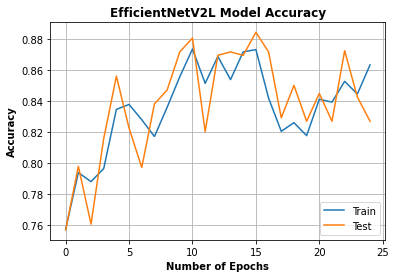

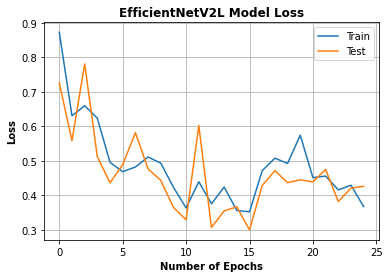

In [ ]:
input_shape=INPUT_SIZE
num_class=15
epochs=25
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/efficientnetv2l.h5'

#Define EfficientNetB7 Model
model_fine_tune = EfficientNetV2L(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in model_fine_tune.layers[:250]:
    layer.trainable = False
for layer in model_fine_tune.layers[250:]:
    layer.trainable = True
model = GlobalAveragePooling2D()(model_fine_tune.output)
model=Dense(units=256,activation='relu')(model)
model=Dropout(0.3)(model)
model = Dense(num_class, activation='softmax')(model)
model = Model(model_fine_tune.input, model, name='efficientnetv2-l')
opt = keras.optimizers.Adam(learning_rate=0.004, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('EfficientNetV2L Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('EfficientNetV2L Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()

**Predictions with pre-trained Models**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.models import Model,load_model
from keras import Input
from keras.layers import concatenate,Dense,Flatten,Dropout
from keras.preprocessing.image import  ImageDataGenerator
import keras.callbacks as kcallbacks
import os
import math
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
from keras.optimizers import SGD
import operator
import numpy as np
from PIL import Image
from collections import defaultdict

In [ ]:
#Generate Images from Test Set
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=32

test_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/test_A',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 1342 images belonging to 15 classes.


In [ ]:
#generate labels indicating attack (1) or normal (0)
label=validation_generator.class_indices
label={v: k for k, v in label.items()}

In [ ]:
print(label)

{0: 'Backdoor', 1: 'DDoS_HTTP', 2: 'DDoS_ICMP', 3: 'DDoS_TCP', 4: 'DDoS_UDP', 5: 'Fingerprinting', 6: 'MITM', 7: 'Normal', 8: 'Password', 9: 'Port_Scanning', 10: 'Ransomware', 11: 'SQL_injection', 12: 'Uploading', 13: 'Vulnerability_scanner', 14: 'XSS'}


In [ ]:
#Read Images from Test Folders
rootdir = '/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/test_A'
true = []          #True Labels
test_images=[]
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if not (file.endswith(".jpeg"))|(file.endswith(".jpg"))|(file.endswith(".png")):
            continue
        true.append(subdir.split('/')[-1])
        test_images.append(os.path.join(subdir, file))
        
print(true[0],test_images[0])

Normal /content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/test_A/Normal/571.png


**Load 8 trained Models**

In [ ]:
#load model 1: Generic CNN Model
cnn_model=load_model('/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/generic_cnn.h5')

In [ ]:
#load model 2: Xception
xception_model=load_model('/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/xception.h5')

In [ ]:
#load model 3: VGG16
vgg_model=load_model('/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/VGG16.h5')

In [ ]:
#load model 4: VGG19
vgg19_model=load_model('/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/VGG19.h5')

In [ ]:
#load model 5: inception
incep_model=load_model('/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/inception.h5')

In [ ]:
#load model 6: InceptionResnetV2
incepresnetv2_model=load_model('/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/inceptionresnetv2.h5')

In [ ]:
#load model 7: EfficientB7
efficientb7_model=load_model('/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/efficientnetb7.h5')

In [ ]:
#load model 8: EfficientNetV2L
efficientnetv2l_model=load_model('/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/efficientnetv2l.h5')

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sn
import pandas as pd
import scikitplot as skplt

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**1. Predictions using Generic CNN**

In [ ]:
%%time
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    input_img=test_images[i]
    test_batch=[]
    this_img=np.array(Image.open(input_img))/255 #Read all the images from test set
    
    test_shape=(1,)+this_img.shape
    this_img=this_img.reshape(test_shape)
    cnn_model_prediction=cnn_model.predict(this_img) #Input image processing using trained master model
    #Results generation by Generic CNN
    prob=cnn_model_prediction[0,np.argmax(cnn_model_prediction,axis=1)[0]]
    res=label[np.argmax(cnn_model_prediction,axis=1)[0]]
    predict.append(res)

1/1 [==============================] - 0s 17ms/step
CPU times: user 1min, sys: 2.85 s, total: 1min 3s
Wall time: 1min 14s


CNN Accuracy: 0.9210134128166915
Precision: 0.9020398961524022
Recall: 0.9210134128166915
F1 Score: 0.9079712125448415
Cohen Kappa Score: 0.8415324956860684


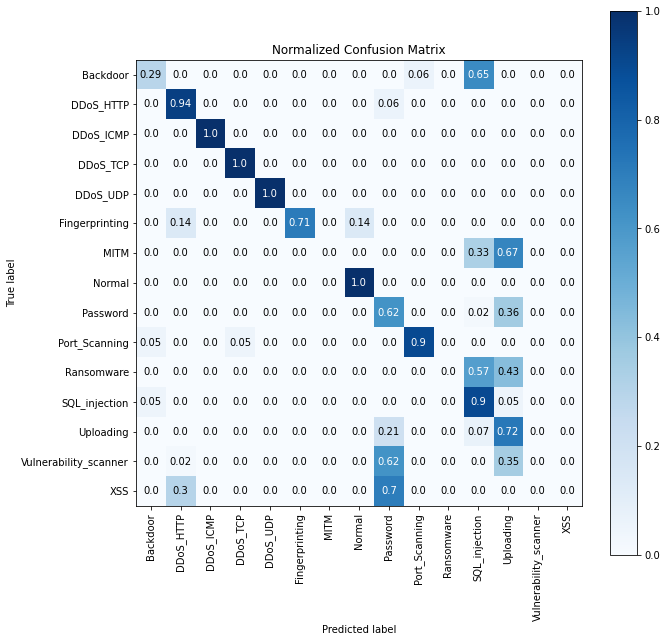

                       precision    recall  f1-score   support

             Backdoor     0.6250    0.2941    0.4000        17
            DDoS_HTTP     0.8611    0.9394    0.8986        33
            DDoS_ICMP     1.0000    1.0000    1.0000        40
             DDoS_TCP     0.9600    1.0000    0.9796        24
             DDoS_UDP     1.0000    1.0000    1.0000        91
       Fingerprinting     1.0000    0.7143    0.8333         7
                 MITM     0.0000    0.0000    0.0000         3
               Normal     0.9989    1.0000    0.9995       940
             Password     0.3939    0.6190    0.4815        42
        Port_Scanning     0.9474    0.9000    0.9231        20
           Ransomware     0.0000    0.0000    0.0000         7
        SQL_injection     0.6481    0.8974    0.7527        39
            Uploading     0.3684    0.7241    0.4884        29
Vulnerability_scanner     0.0000    0.0000    0.0000        40
                  XSS     0.0000    0.0000    0.0000  

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
acc=accuracy_score(true,predict)
pre=precision_score(true,predict,average='weighted')
re=recall_score(true,predict,average='weighted')
f1=f1_score(true,predict,average='weighted')
cks=cohen_kappa_score(true,predict)
print('CNN Accuracy: %s'%acc)
print('Precision: %s'%pre)
print('Recall: %s'%re)
print('F1 Score: %s'%f1)
print('Cohen Kappa Score: %s'%cks)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM', 'Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS']
skplt.metrics.plot_confusion_matrix(true, predict, normalize=True, x_tick_rotation=90,figsize=(10,10),cmap='Blues' )
plt.show()
print(classification_report(true, predict, target_names=target_names,digits=4))

**2. Predictions using Xception**

In [ ]:
%%time
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    input_img=test_images[i]
    test_batch=[]
    this_img=np.array(Image.open(input_img))/255 #Read all the images from test set
     
    test_shape=(1,)+this_img.shape
    this_img=this_img.reshape(test_shape)
    xception_model_prediction=xception_model.predict(this_img) #Input image processing using trained master model
    #Results generation by Xception
    prob=xception_model_prediction[0,np.argmax(xception_model_prediction,axis=1)[0]]
    res=label[np.argmax(xception_model_prediction,axis=1)[0]]
    predict.append(res)

1/1 [==============================] - 0s 19ms/step
CPU times: user 1min 10s, sys: 2.6 s, total: 1min 12s
Wall time: 1min 20s


Xception Accuracy: 0.9210134128166915
Precision: 0.8976335331205149
Recall: 0.9210134128166915
F1 Score: 0.9021526667978214
Cohen Kappa Score: 0.8416857531423128


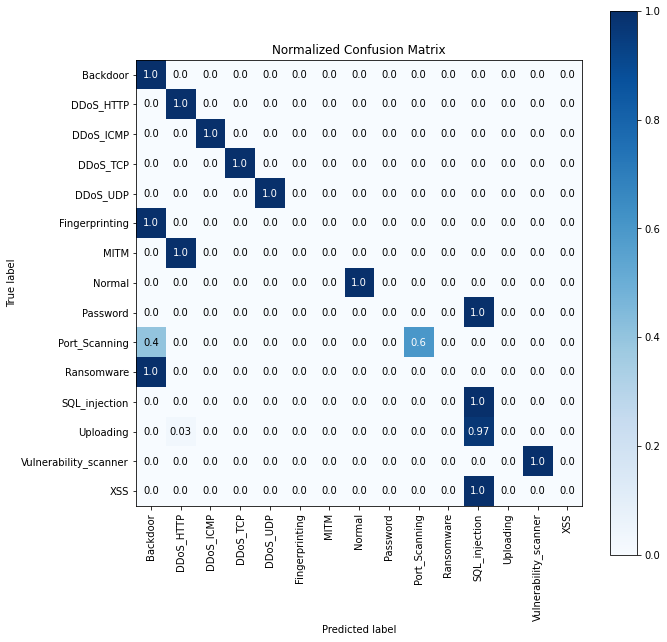

                       precision    recall  f1-score   support

             Backdoor     0.4359    1.0000    0.6071        17
            DDoS_HTTP     0.8919    1.0000    0.9429        33
            DDoS_ICMP     1.0000    1.0000    1.0000        40
             DDoS_TCP     1.0000    1.0000    1.0000        24
             DDoS_UDP     1.0000    1.0000    1.0000        91
       Fingerprinting     0.0000    0.0000    0.0000         7
                 MITM     0.0000    0.0000    0.0000         3
               Normal     1.0000    1.0000    1.0000       940
             Password     0.0000    0.0000    0.0000        42
        Port_Scanning     1.0000    0.6000    0.7500        20
           Ransomware     0.0000    0.0000    0.0000         7
        SQL_injection     0.3277    1.0000    0.4937        39
            Uploading     0.0000    0.0000    0.0000        29
Vulnerability_scanner     1.0000    1.0000    1.0000        40
                  XSS     0.0000    0.0000    0.0000  

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
acc=accuracy_score(true,predict)
pre=precision_score(true,predict,average='weighted')
re=recall_score(true,predict,average='weighted')
f1=f1_score(true,predict,average='weighted')
cks=cohen_kappa_score(true,predict)
print('Xception Accuracy: %s'%acc)
print('Precision: %s'%pre)
print('Recall: %s'%re)
print('F1 Score: %s'%f1)
print('Cohen Kappa Score: %s'%cks)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM', 'Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS']
skplt.metrics.plot_confusion_matrix(true, predict, normalize=True, x_tick_rotation=90,figsize=(10,10),cmap='Blues' )
plt.show()
print(classification_report(true, predict, target_names=target_names,digits=4))

**3. Predictions using VGG16**

In [ ]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    input_img=test_images[i]
    test_batch=[]
    this_img=np.array(Image.open(input_img))/255 #Read all the images from test set
     
    test_shape=(1,)+this_img.shape
    this_img=this_img.reshape(test_shape)
    vgg_model_prediction=vgg_model.predict(this_img) #Input image processing using trained master model
    #Results generation by VGG16
    prob=vgg_model_prediction[0,np.argmax(vgg_model_prediction,axis=1)[0]]
    res=label[np.argmax(vgg_model_prediction,axis=1)[0]]
    predict.append(res)

1/1 [==============================] - 0s 16ms/step
CPU times: user 1min 6s, sys: 2.53 s, total: 1min 8s
Wall time: 1min 18s


VGG16 Accuracy: 0.8979135618479881
Precision: 0.8643246924798896
Recall: 0.8979135618479881
F1 Score: 0.8741115845950642
Cohen Kappa Score: 0.7925858237158877


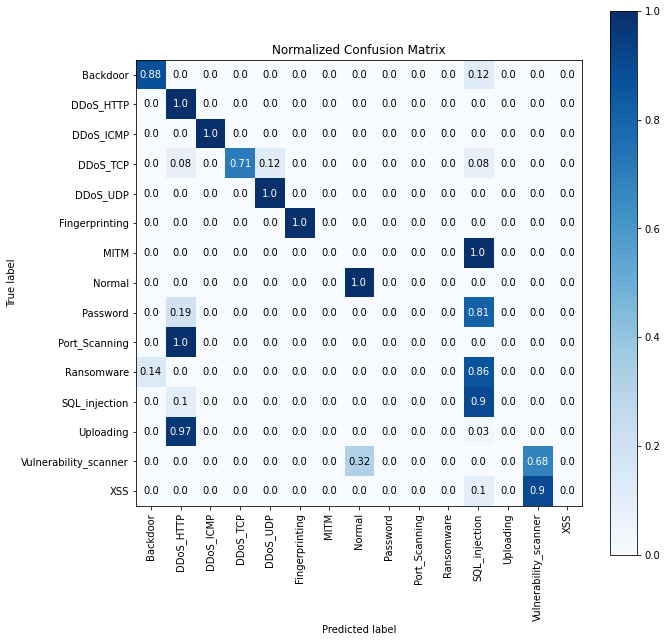

                       precision    recall  f1-score   support

             Backdoor     0.9375    0.8824    0.9091        17
            DDoS_HTTP     0.3474    1.0000    0.5156        33
            DDoS_ICMP     1.0000    1.0000    1.0000        40
             DDoS_TCP     1.0000    0.7083    0.8293        24
             DDoS_UDP     0.9681    1.0000    0.9838        91
       Fingerprinting     1.0000    1.0000    1.0000         7
                 MITM     0.0000    0.0000    0.0000         3
               Normal     0.9864    1.0000    0.9931       940
             Password     0.0000    0.0000    0.0000        42
        Port_Scanning     0.0000    0.0000    0.0000        20
           Ransomware     0.0000    0.0000    0.0000         7
        SQL_injection     0.4167    0.8974    0.5691        39
            Uploading     0.0000    0.0000    0.0000        29
Vulnerability_scanner     0.7500    0.6750    0.7105        40
                  XSS     0.0000    0.0000    0.0000  

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
acc=accuracy_score(true,predict)
pre=precision_score(true,predict,average='weighted')
re=recall_score(true,predict,average='weighted')
f1=f1_score(true,predict,average='weighted')
cks=cohen_kappa_score(true,predict)
print('VGG16 Accuracy: %s'%acc)
print('Precision: %s'%pre)
print('Recall: %s'%re)
print('F1 Score: %s'%f1)
print('Cohen Kappa Score: %s'%cks)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM', 'Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS']
skplt.metrics.plot_confusion_matrix(true, predict, normalize=True, x_tick_rotation=90,figsize=(10,10),cmap='Blues' )
plt.show()
print(classification_report(true, predict, target_names=target_names,digits=4))

**4. Predictions using VGG19**

In [ ]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    input_img=test_images[i]
    test_batch=[]
    this_img=np.array(Image.open(input_img))/255 #Read all the images from test set
     
    test_shape=(1,)+this_img.shape
    this_img=this_img.reshape(test_shape)
    vgg19_model_prediction=vgg19_model.predict(this_img) #Input image processing using trained master model
    #Results generation by Generic VGG19
    prob=vgg19_model_prediction[0,np.argmax(vgg19_model_prediction,axis=1)[0]]
    res=label[np.argmax(vgg19_model_prediction,axis=1)[0]]
    predict.append(res)

1/1 [==============================] - 0s 15ms/step
CPU times: user 1min 9s, sys: 2.64 s, total: 1min 12s
Wall time: 1min 20s


VGG19 Accuracy: 0.9769001490312966
Precision: 0.9749856176786373
Recall: 0.9769001490312966
F1 Score: 0.974057348561297
Cohen Kappa Score: 0.9537265056515462


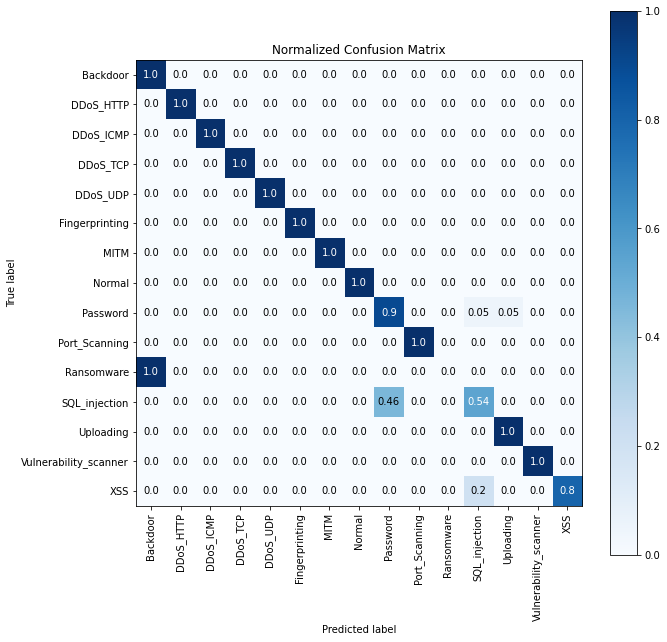

                       precision    recall  f1-score   support

             Backdoor     0.7083    1.0000    0.8293        17
            DDoS_HTTP     1.0000    1.0000    1.0000        33
            DDoS_ICMP     1.0000    1.0000    1.0000        40
             DDoS_TCP     1.0000    1.0000    1.0000        24
             DDoS_UDP     1.0000    1.0000    1.0000        91
       Fingerprinting     1.0000    1.0000    1.0000         7
                 MITM     1.0000    1.0000    1.0000         3
               Normal     1.0000    1.0000    1.0000       940
             Password     0.6786    0.9048    0.7755        42
        Port_Scanning     1.0000    1.0000    1.0000        20
           Ransomware     0.0000    0.0000    0.0000         7
        SQL_injection     0.8400    0.5385    0.6562        39
            Uploading     0.9355    1.0000    0.9667        29
Vulnerability_scanner     1.0000    1.0000    1.0000        40
                  XSS     1.0000    0.8000    0.8889  

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
acc=accuracy_score(true,predict)
pre=precision_score(true,predict,average='weighted')
re=recall_score(true,predict,average='weighted')
f1=f1_score(true,predict,average='weighted')
cks=cohen_kappa_score(true,predict)
print('VGG19 Accuracy: %s'%acc)
print('Precision: %s'%pre)
print('Recall: %s'%re)
print('F1 Score: %s'%f1)
print('Cohen Kappa Score: %s'%cks)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM', 'Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS']
skplt.metrics.plot_confusion_matrix(true, predict, normalize=True, x_tick_rotation=90,figsize=(10,10),cmap='Blues' )
plt.show()
print(classification_report(true, predict, target_names=target_names,digits=4))

**5. Predictions using Inception**

In [ ]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    input_img=test_images[i]
    test_batch=[]
    this_img=np.array(Image.open(input_img))/255 #Read all the images from test set
     
    test_shape=(1,)+this_img.shape
    this_img=this_img.reshape(test_shape)
    incep_model_prediction=incep_model.predict(this_img) #Input image processing using trained master model
    #Results generation by Inception
    prob=incep_model_prediction[0,np.argmax(incep_model_prediction,axis=1)[0]]
    res=label[np.argmax(incep_model_prediction,axis=1)[0]]
    predict.append(res)

1/1 [==============================] - 0s 25ms/step
CPU times: user 1min 19s, sys: 2.45 s, total: 1min 21s
Wall time: 1min 32s


Inception Accuracy: 0.9783904619970194
Precision: 0.971085736037464
Recall: 0.9783904619970194
F1 Score: 0.9736191704412079
Cohen Kappa Score: 0.9570616382510876


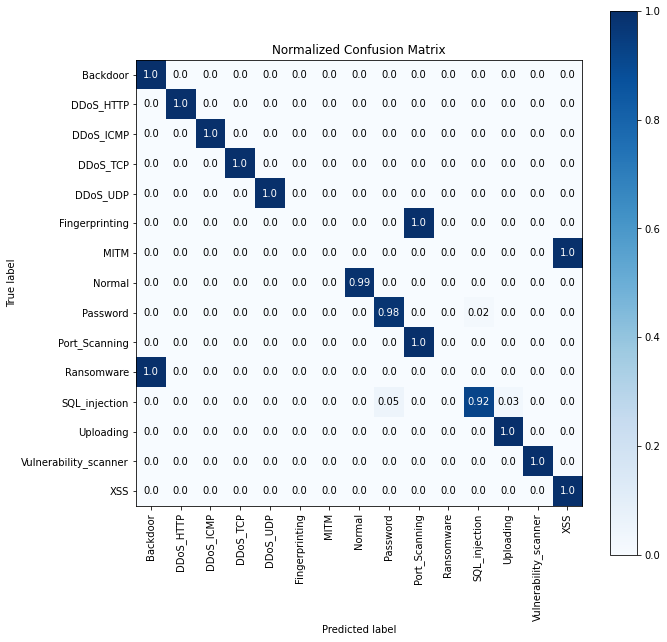

                       precision    recall  f1-score   support

             Backdoor     0.7083    1.0000    0.8293        17
            DDoS_HTTP     0.8919    1.0000    0.9429        33
            DDoS_ICMP     1.0000    1.0000    1.0000        40
             DDoS_TCP     1.0000    1.0000    1.0000        24
             DDoS_UDP     1.0000    1.0000    1.0000        91
       Fingerprinting     0.0000    0.0000    0.0000         7
                 MITM     0.0000    0.0000    0.0000         3
               Normal     1.0000    0.9915    0.9957       940
             Password     0.9535    0.9762    0.9647        42
        Port_Scanning     0.7407    1.0000    0.8511        20
           Ransomware     0.0000    0.0000    0.0000         7
        SQL_injection     0.9730    0.9231    0.9474        39
            Uploading     0.9667    1.0000    0.9831        29
Vulnerability_scanner     1.0000    1.0000    1.0000        40
                  XSS     0.5882    1.0000    0.7407  

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
acc=accuracy_score(true,predict)
pre=precision_score(true,predict,average='weighted')
re=recall_score(true,predict,average='weighted')
f1=f1_score(true,predict,average='weighted')
cks=cohen_kappa_score(true,predict)
print('Inception Accuracy: %s'%acc)
print('Precision: %s'%pre)
print('Recall: %s'%re)
print('F1 Score: %s'%f1)
print('Cohen Kappa Score: %s'%cks)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM', 'Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS']
skplt.metrics.plot_confusion_matrix(true, predict, normalize=True, x_tick_rotation=90,figsize=(10,10),cmap='Blues' )
plt.show()
print(classification_report(true, predict, target_names=target_names,digits=4))

**6. Predictions using InceptionresnetV2**

In [ ]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    input_img=test_images[i]
    test_batch=[]
    this_img=np.array(Image.open(input_img))/255 #Read all the images from test set
     
    test_shape=(1,)+this_img.shape
    this_img=this_img.reshape(test_shape)
    incepresnetv2_model_prediction=incepresnetv2_model.predict(this_img) #Input image processing using trained master model
    #Results generation by InceptionResnetV2
    prob=incepresnetv2_model_prediction[0,np.argmax(incepresnetv2_model_prediction,axis=1)[0]]
    res=label[np.argmax(incepresnetv2_model_prediction,axis=1)[0]]
    predict.append(res)

1/1 [==============================] - 0s 35ms/step
CPU times: user 1min 50s, sys: 2.51 s, total: 1min 52s
Wall time: 2min 12s


InseptionResnetV2 Accuracy: 0.8837555886736215
Precision: 0.8434845013230071
Recall: 0.8837555886736215
F1 Score: 0.8521561569198035
Cohen Kappa Score: 0.7664704524082818


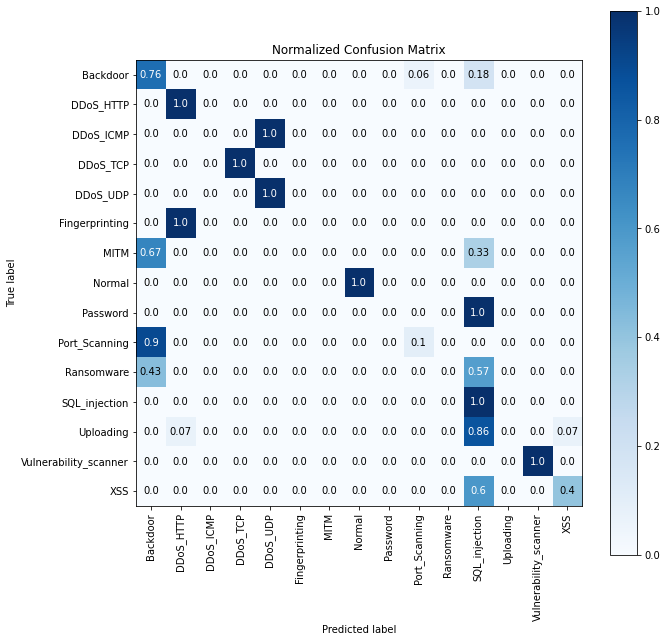

                       precision    recall  f1-score   support

             Backdoor     0.3611    0.7647    0.4906        17
            DDoS_HTTP     0.7857    1.0000    0.8800        33
            DDoS_ICMP     0.0000    0.0000    0.0000        40
             DDoS_TCP     1.0000    1.0000    1.0000        24
             DDoS_UDP     0.6947    1.0000    0.8198        91
       Fingerprinting     0.0000    0.0000    0.0000         7
                 MITM     0.0000    0.0000    0.0000         3
               Normal     1.0000    1.0000    1.0000       940
             Password     0.0000    0.0000    0.0000        42
        Port_Scanning     0.6667    0.1000    0.1739        20
           Ransomware     0.0000    0.0000    0.0000         7
        SQL_injection     0.3250    1.0000    0.4906        39
            Uploading     0.0000    0.0000    0.0000        29
Vulnerability_scanner     1.0000    1.0000    1.0000        40
                  XSS     0.6667    0.4000    0.5000  

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
acc=accuracy_score(true,predict)
pre=precision_score(true,predict,average='weighted')
re=recall_score(true,predict,average='weighted')
f1=f1_score(true,predict,average='weighted')
cks=cohen_kappa_score(true,predict)
print('InseptionResnetV2 Accuracy: %s'%acc)
print('Precision: %s'%pre)
print('Recall: %s'%re)
print('F1 Score: %s'%f1)
print('Cohen Kappa Score: %s'%cks)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM', 'Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS']
skplt.metrics.plot_confusion_matrix(true, predict, normalize=True, x_tick_rotation=90,figsize=(10,10),cmap='Blues' )
plt.show()
print(classification_report(true, predict, target_names=target_names,digits=4))

**7. Predictions using EfficientnetB7**

In [ ]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    input_img=test_images[i]
    test_batch=[]
    this_img=np.array(Image.open(input_img))/255 #Read all the images from test set
     
    test_shape=(1,)+this_img.shape
    this_img=this_img.reshape(test_shape)
    efficientb7_model_prediction=efficientb7_model.predict(this_img) #Input image processing using trained master model
    #Results generation by EfficientNetB7
    prob=efficientb7_model_prediction[0,np.argmax(efficientb7_model_prediction,axis=1)[0]]
    res=label[np.argmax(efficientb7_model_prediction,axis=1)[0]]
    predict.append(res)

1/1 [==============================] - 0s 47ms/step
CPU times: user 1min 59s, sys: 2.47 s, total: 2min 2s
Wall time: 2min 23s


Efficient Net B7 Accuracy: 0.9336810730253353
Precision: 0.9225116823622296
Recall: 0.9336810730253353
F1 Score: 0.9167372844938642
Cohen Kappa Score: 0.8670856846526132


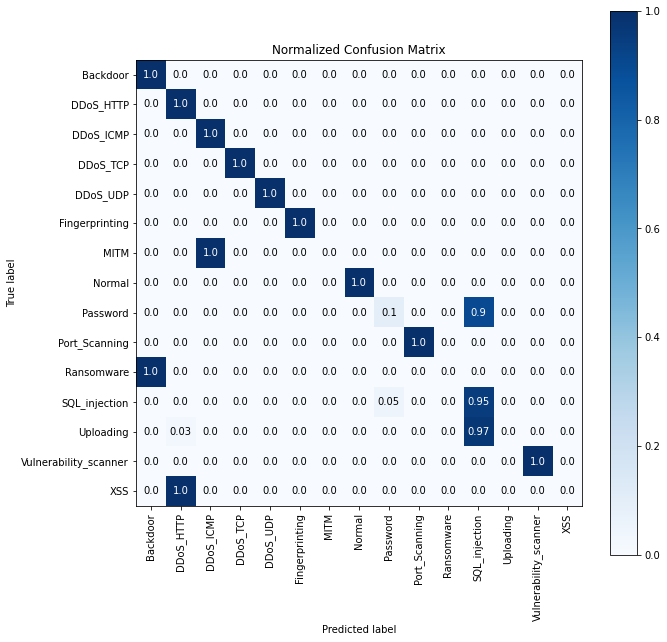

                       precision    recall  f1-score   support

             Backdoor     0.7083    1.0000    0.8293        17
            DDoS_HTTP     0.7500    1.0000    0.8571        33
            DDoS_ICMP     0.9302    1.0000    0.9639        40
             DDoS_TCP     1.0000    1.0000    1.0000        24
             DDoS_UDP     1.0000    1.0000    1.0000        91
       Fingerprinting     1.0000    1.0000    1.0000         7
                 MITM     0.0000    0.0000    0.0000         3
               Normal     1.0000    1.0000    1.0000       940
             Password     0.6667    0.0952    0.1667        42
        Port_Scanning     1.0000    1.0000    1.0000        20
           Ransomware     0.0000    0.0000    0.0000         7
        SQL_injection     0.3592    0.9487    0.5211        39
            Uploading     0.0000    0.0000    0.0000        29
Vulnerability_scanner     1.0000    1.0000    1.0000        40
                  XSS     0.0000    0.0000    0.0000  

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
acc=accuracy_score(true,predict)
pre=precision_score(true,predict,average='weighted')
re=recall_score(true,predict,average='weighted')
f1=f1_score(true,predict,average='weighted')
cks=cohen_kappa_score(true,predict)
print('Efficient Net B7 Accuracy: %s'%acc)
print('Precision: %s'%pre)
print('Recall: %s'%re)
print('F1 Score: %s'%f1)
print('Cohen Kappa Score: %s'%cks)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM', 'Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS']
skplt.metrics.plot_confusion_matrix(true, predict, normalize=True, x_tick_rotation=90,figsize=(10,10),cmap='Blues' )
plt.show()
print(classification_report(true, predict, target_names=target_names,digits=4))

**8. Predictions using EfficientnetV2L**

In [ ]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    input_img=test_images[i]
    test_batch=[]
    this_img=np.array(Image.open(input_img))/255 #Read all the images from test set
     
    test_shape=(1,)+this_img.shape
    this_img=this_img.reshape(test_shape)
    efficientnetv2l_model_prediction=efficientnetv2l_model.predict(this_img) #Input image processing using trained master model
    #Results generation by EfficientNetV2L
    prob=efficientnetv2l_model_prediction[0,np.argmax(efficientnetv2l_model_prediction,axis=1)[0]]
    res=label[np.argmax(efficientnetv2l_model_prediction,axis=1)[0]]
    predict.append(res)

1/1 [==============================] - 0s 48ms/step
CPU times: user 2min 11s, sys: 2.43 s, total: 2min 14s
Wall time: 2min 29s


Efficient NetV2L Accuracy: 0.8845007451564829
Precision: 0.8539678666068313
Recall: 0.8845007451564829
F1 Score: 0.8597893322688084
Cohen Kappa Score: 0.7684571415849905


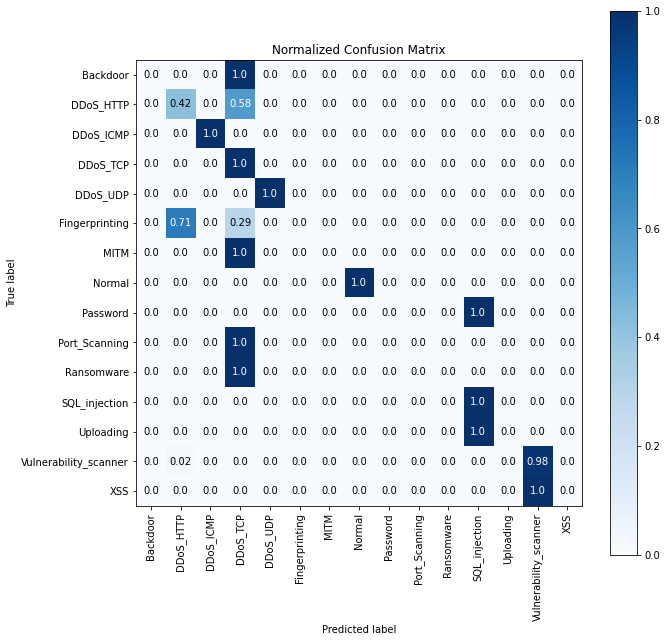

                       precision    recall  f1-score   support

             Backdoor     0.0000    0.0000    0.0000        17
            DDoS_HTTP     0.7000    0.4242    0.5283        33
            DDoS_ICMP     1.0000    1.0000    1.0000        40
             DDoS_TCP     0.2609    1.0000    0.4138        24
             DDoS_UDP     1.0000    1.0000    1.0000        91
       Fingerprinting     0.0000    0.0000    0.0000         7
                 MITM     0.0000    0.0000    0.0000         3
               Normal     1.0000    1.0000    1.0000       940
             Password     0.0000    0.0000    0.0000        42
        Port_Scanning     0.0000    0.0000    0.0000        20
           Ransomware     0.0000    0.0000    0.0000         7
        SQL_injection     0.3545    1.0000    0.5235        39
            Uploading     0.0000    0.0000    0.0000        29
Vulnerability_scanner     0.7959    0.9750    0.8764        40
                  XSS     0.0000    0.0000    0.0000  

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
acc=accuracy_score(true,predict)
pre=precision_score(true,predict,average='weighted')
re=recall_score(true,predict,average='weighted')
f1=f1_score(true,predict,average='weighted')
cks=cohen_kappa_score(true,predict)
print('Efficient NetV2L Accuracy: %s'%acc)
print('Precision: %s'%pre)
print('Recall: %s'%re)
print('F1 Score: %s'%f1)
print('Cohen Kappa Score: %s'%cks)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM', 'Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS']
skplt.metrics.plot_confusion_matrix(true, predict, normalize=True, x_tick_rotation=90,figsize=(10,10),cmap='Blues' )
plt.show()
print(classification_report(true, predict, target_names=target_names,digits=4))

**Bootstrap Aggregation Ensembles**

In [ ]:
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range((length//127)+1):
    input_img=test_images[127*i:127*(i+1)]
    test_batch=[]
    for path in input_img:
        this_img=np.array(Image.open(path))/255
        test_batch.append(this_img)
    #Results generation by Generic CNN
    cnn_model_prediction=cnn_model.predict(np.array(test_batch))
    cnn_model_prediction=list(np.argmax(cnn_model_prediction,axis=1))
    cnn_model_prediction=[label[con] for con in cnn_model_prediction]
    #Results generation by Xception
    xception_model_prediction=xception_model.predict(np.array(test_batch))
    xception_model_prediction=list(np.argmax(xception_model_prediction,axis=1))
    xception_model_prediction=[label[con] for con in xception_model_prediction]
    #Results generation by VGG19
    vgg19_model_prediction=vgg19_model.predict(np.array(test_batch))
    vgg19_model_prediction=list(np.argmax(vgg19_model_prediction,axis=1))
    vgg19_model_prediction=[label[con] for con in vgg19_model_prediction]
    #Results generation by Inception
    incep_model_prediction=incep_model.predict(np.array(test_batch))
    incep_model_prediction=list(np.argmax(incep_model_prediction,axis=1))
    incep_model_prediction=[label[con] for con in incep_model_prediction]
    #Results generation by EfficientNetB7
    efficientb7_model_prediction=efficientb7_model.predict(np.array(test_batch))
    efficientb7_model_prediction=list(np.argmax(efficientb7_model_prediction,axis=1))
    efficientb7_model_prediction=[label[con] for con in efficientb7_model_prediction]
    
    #Results integration of Five best-performing models
    predict_batch=[]
    for i,j,k,p,q in zip(cnn_model_prediction, xception_model_prediction,vgg19_model_prediction,incep_model_prediction,efficientb7_model_prediction):
        count=defaultdict(int)
        count[i]+=1
        count[j]+=1
        count[k]+=1
        count[p]+=1
        count[q]+=1
        #Arrang the predicted results in descending order
        predict_one=sorted(count.items(), key=operator.itemgetter(1),reverse=True)[0][0]
        predict_batch.append(predict_one)
    predict.append(predict_batch)
t2 = time.time()
print('The Testing Time is :%f seconds' % (t2-t1))

3/3 [==============================] - 1s 561ms/step
The Testing Time is :56.136273 seconds


In [ ]:
predict=sum(predict,[])

Ensemble Accuracy: 0.9716840536512668
Precision: 0.9733009892222295
Recall: 0.9716840536512668
F1 Score: 0.9686081126483227
Cohen Kappa Score: 0.9432669244701161


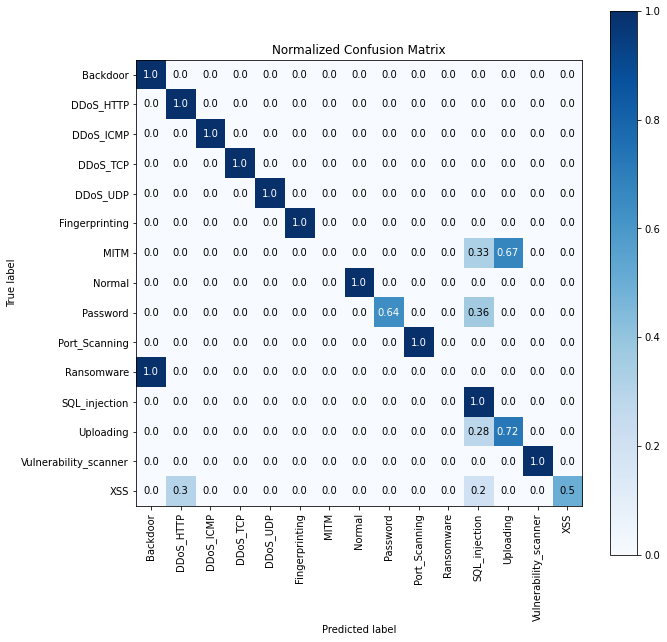

                       precision    recall  f1-score   support

             Backdoor     0.7083    1.0000    0.8293        17
            DDoS_HTTP     0.9167    1.0000    0.9565        33
            DDoS_ICMP     1.0000    1.0000    1.0000        40
             DDoS_TCP     1.0000    1.0000    1.0000        24
             DDoS_UDP     1.0000    1.0000    1.0000        91
       Fingerprinting     1.0000    1.0000    1.0000         7
                 MITM     0.0000    0.0000    0.0000         3
               Normal     1.0000    1.0000    1.0000       940
             Password     1.0000    0.6429    0.7826        42
        Port_Scanning     1.0000    1.0000    1.0000        20
           Ransomware     0.0000    0.0000    0.0000         7
        SQL_injection     0.6000    1.0000    0.7500        39
            Uploading     0.9130    0.7241    0.8077        29
Vulnerability_scanner     1.0000    1.0000    1.0000        40
                  XSS     1.0000    0.5000    0.6667  

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
acc=accuracy_score(true,predict)
pre=precision_score(true,predict,average='weighted')
re=recall_score(true,predict,average='weighted')
f1=f1_score(true,predict,average='weighted')
cks=cohen_kappa_score(true,predict)
print('Ensemble Accuracy: %s'%acc)
print('Precision: %s'%pre)
print('Recall: %s'%re)
print('F1 Score: %s'%f1)
print('Cohen Kappa Score: %s'%cks)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM', 'Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS']
skplt.metrics.plot_confusion_matrix(true, predict, normalize=True, x_tick_rotation=90,figsize=(10,10),cmap='Blues' )
plt.show()
print(classification_report(true, predict, target_names=target_names,digits=4))